# Customer Churn Analysis

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

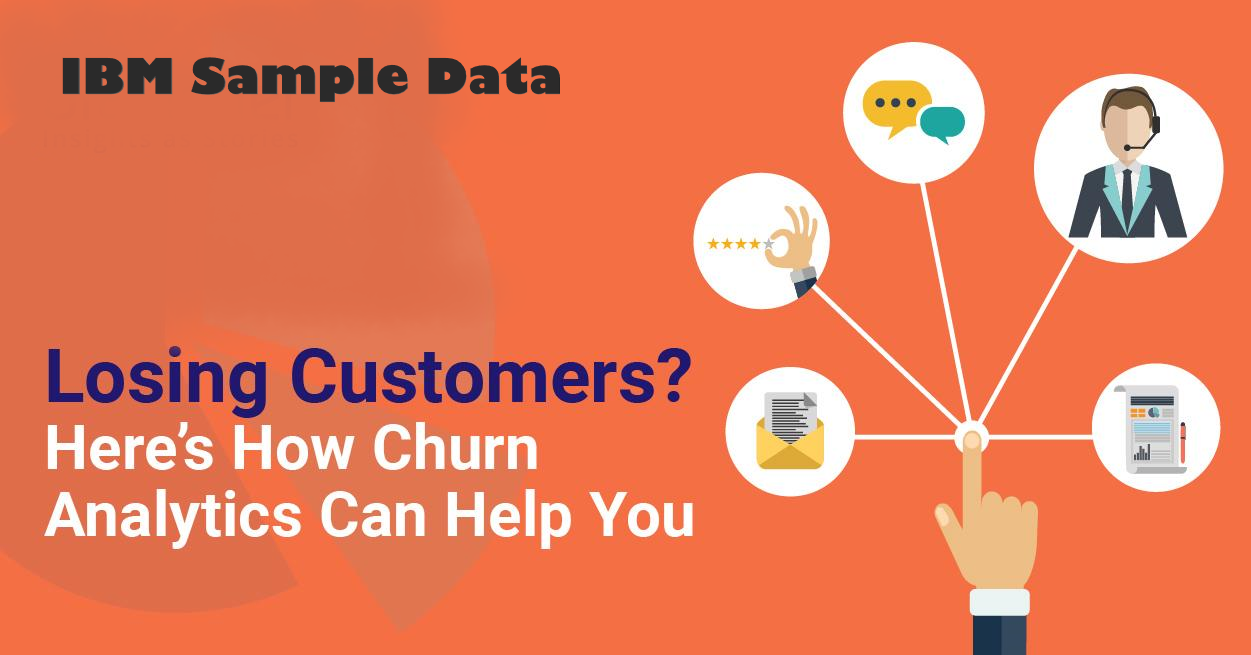

In [88]:
# Importing neccesarry liabraries for data manipulation and EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [89]:
df=pd.read_csv(r'E:\Data Science Certificates\Evaluation project\Customer Churn Analysis\Telecom_customer_churn.csv')
df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


We are just trying to take overview of data by looking at some top and bottom raws

In [92]:
df.shape

(7043, 21)

We can see we have 7043 rows and 21 columns are avaible. Looking at count we have good amount of data to understand the trend of data 

In [93]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

I can see above we have "customer ID" Columns present in data set which we dont required for predication or to train model as it will not contribute ever as every customer has unique ID

In [94]:
df.drop("customerID",axis=1,inplace=True)

In [95]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


We removed "Customer ID" column

We can see that we have so many "Object" Data Available in dataset which we need to encode for model training.

Before I apply encoding for data I will keep original data in another variable which I can use for visualization purpose

In [96]:
df1=df

In [97]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We can observe below ponits

* Total charges has good uniquness and that is countineues data
* Second highest is Monthly charges
* Tenure has 73 unique values

In [98]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We dont have any missing data present in data set which is good as we have original values

In [99]:
df.loc[df['gender']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There is no black space availbale in dataset

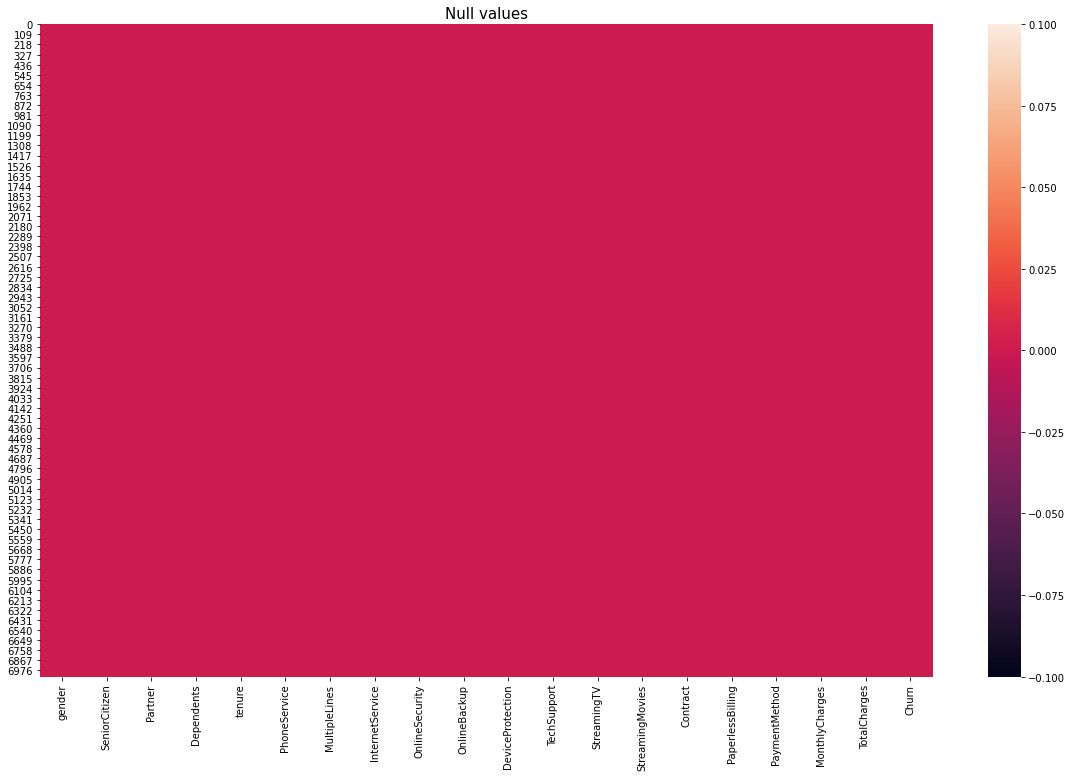

In [100]:
plt.figure(figsize=(20,12))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

We can also observe in above heatmap that there is no blank values or null value available in Dataset

<AxesSubplot:>

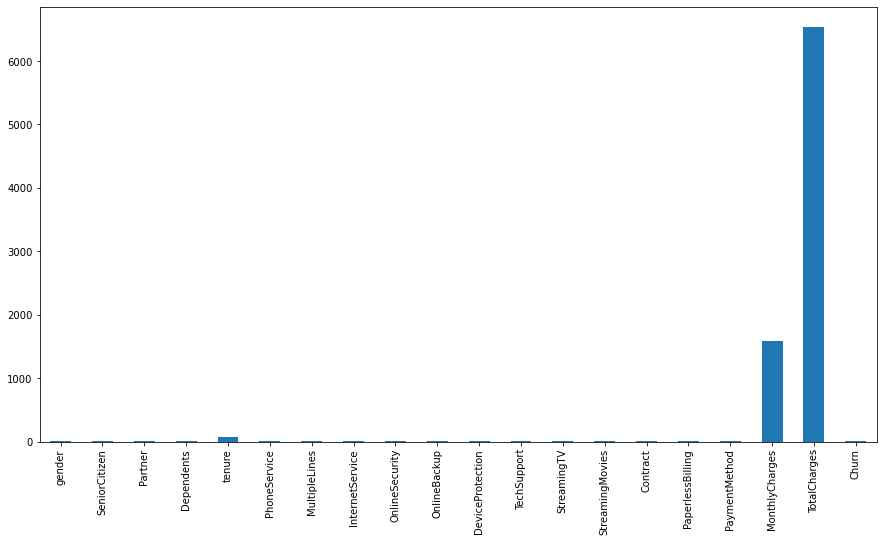

In [101]:
count = df.nunique()

plt.figure(figsize=(15,8))
count.plot(kind='bar')

As we already observed that Monthly charges and total charges has good variation of data

<AxesSubplot:xlabel='Churn', ylabel='count'>

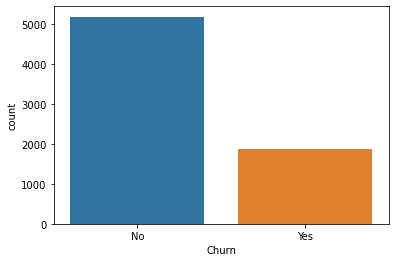

In [102]:
sns.countplot(x='Churn',data=df)

Below is the main poitn looking at above plot

* count of "Yes" is very low and "No" is high which can create bias in model
* We need to use oversampling to match the both count so that model can train well

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

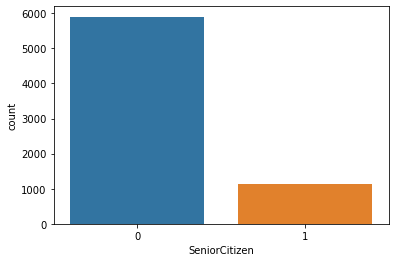

In [103]:
sns.countplot(x='SeniorCitizen',data=df)

More part of data is belongs to non SeniorCitizen and we have very less data for Senior Citizen

<AxesSubplot:xlabel='tenure', ylabel='count'>

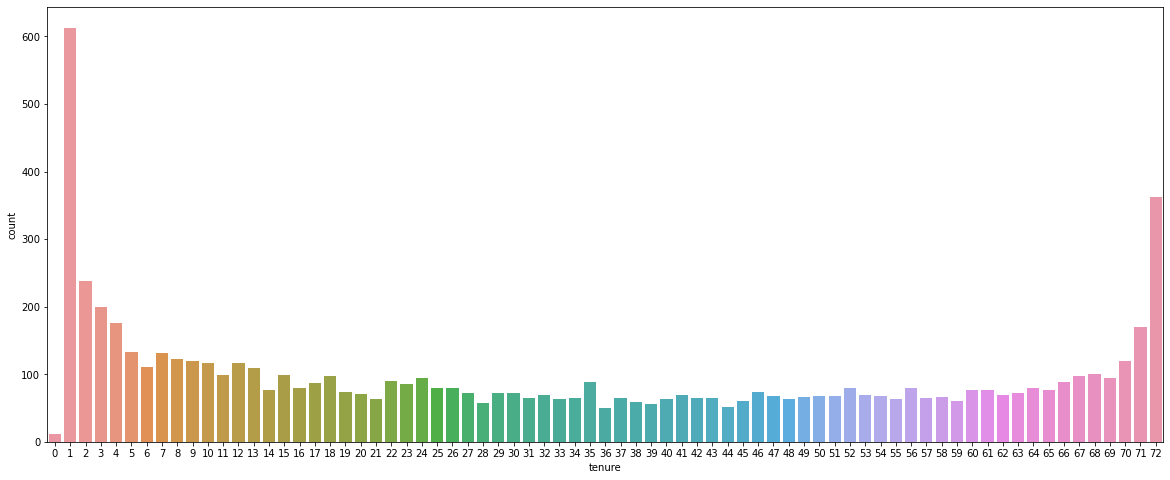

In [104]:
plt.figure(figsize=(20,8))
sns.countplot(x='tenure',data=df)

lokking at above chart we can see that highest data is belongs to 1 and 72 we may see skewness in this data

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

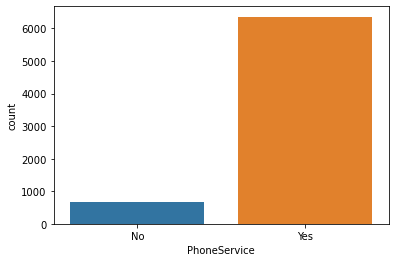

In [105]:
sns.countplot(x='PhoneService',data=df)

Most of users are using phone service

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

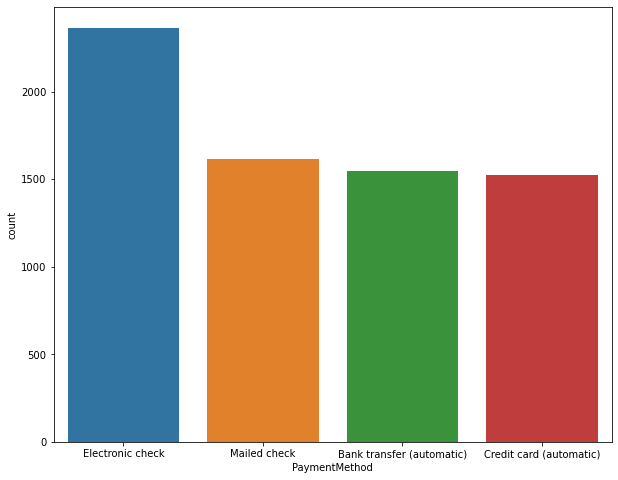

In [106]:
plt.figure(figsize=(10,8))
sns.countplot(x='PaymentMethod',data=df)

* Electronic check most preferred payment method
* Credit card and Bank transfer having almost same preferrence
* mailed check is second highest payment choice

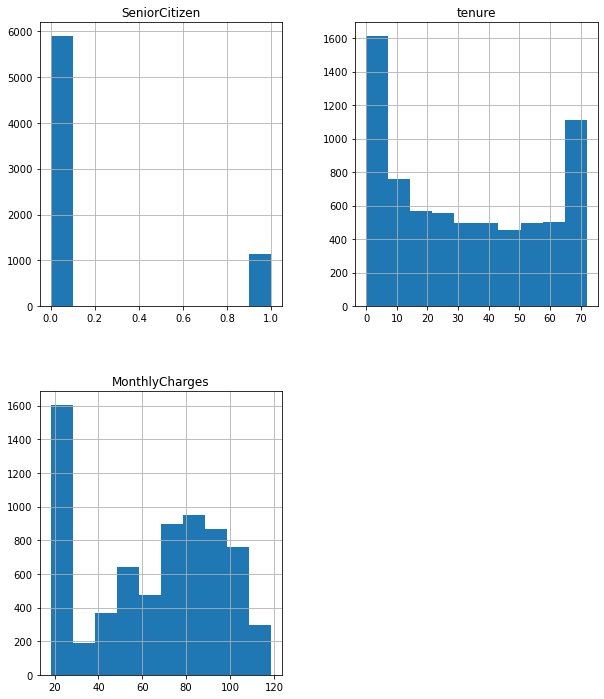

In [107]:
df.hist(figsize=(10,12))
plt.show()

In Above chart below is observation


* Monthly charges are higher count in range on 20
* Tenure may have some outliers

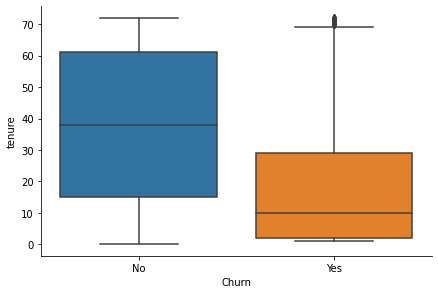

In [108]:
sns.catplot(x='Churn', y = 'tenure', 
            data = df,
            kind = 'box',
            height = 4,
            aspect=1.5)

Those who has less tenure, there is high chnaces of churn

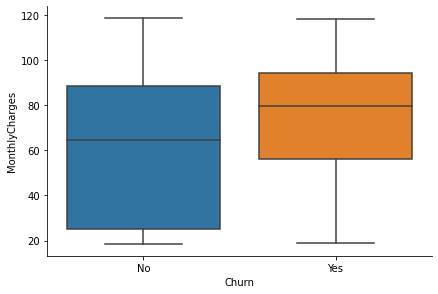

In [109]:
sns.catplot(x='Churn', y = 'MonthlyCharges', 
            data = df,
            kind = 'box',
            height = 4,
            aspect=1.5)

Those who are paying higher charges they have higher chnace to switch to other service provider

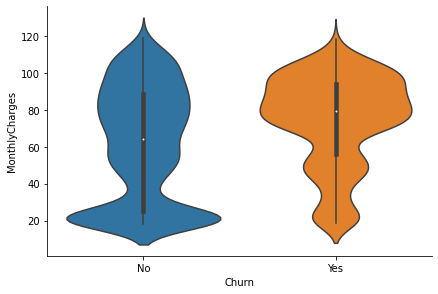

In [110]:
sns.catplot(x='Churn',
            y='MonthlyCharges',
            data=df,
            height=4,aspect=1.5,
            kind='violin')


If company is charging high for some serive then customers are leaving
Charges should be as per market standard

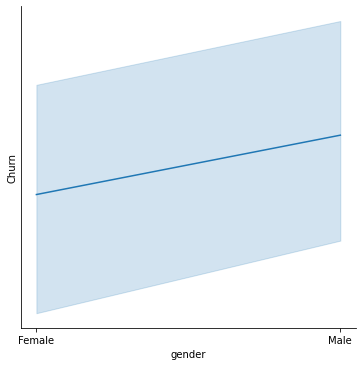

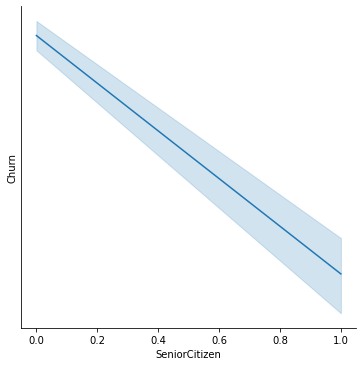

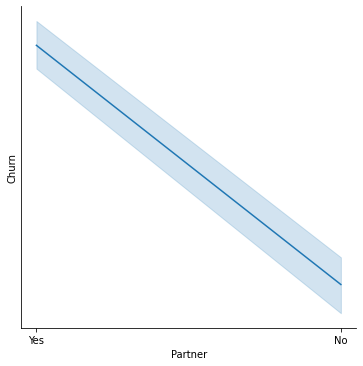

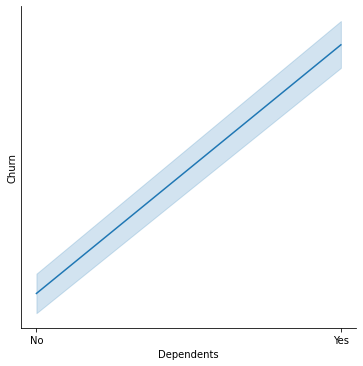

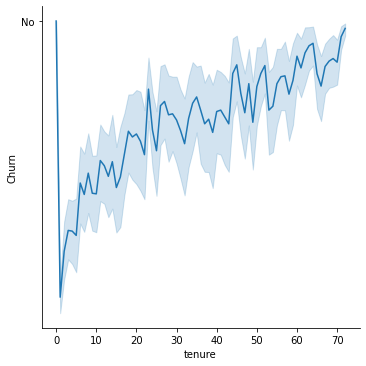

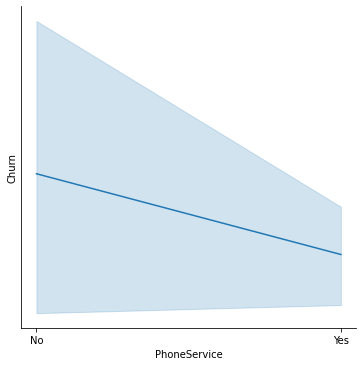

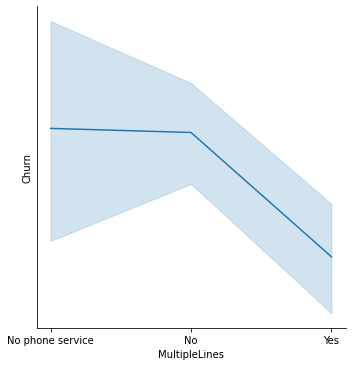

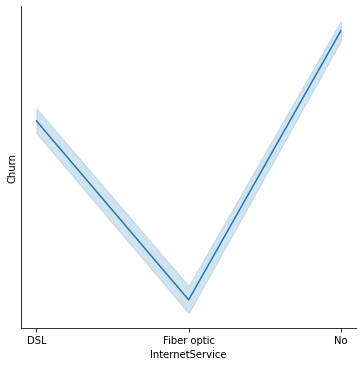

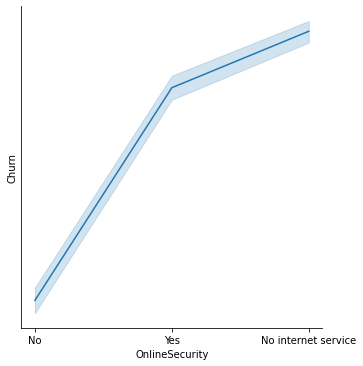

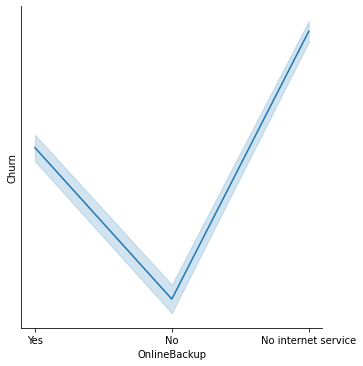

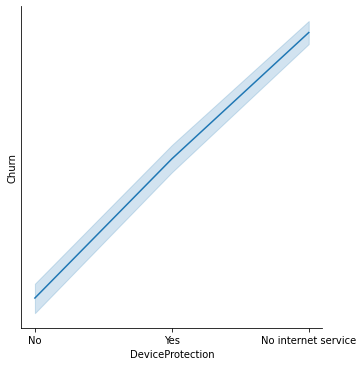

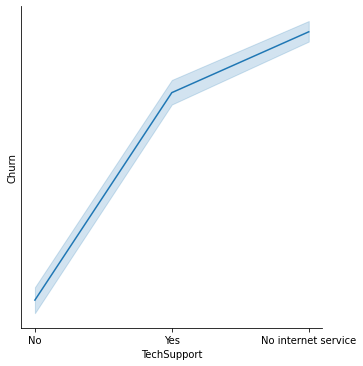

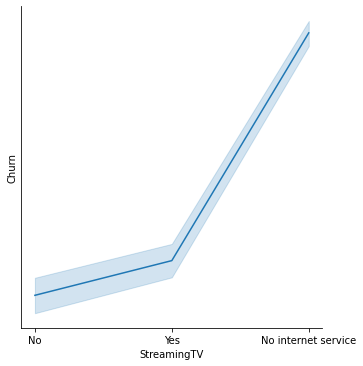

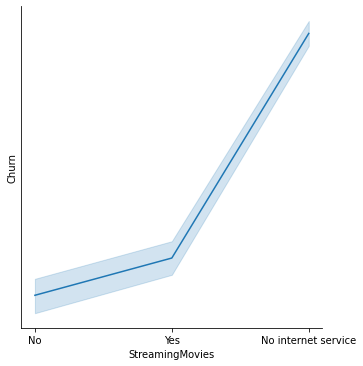

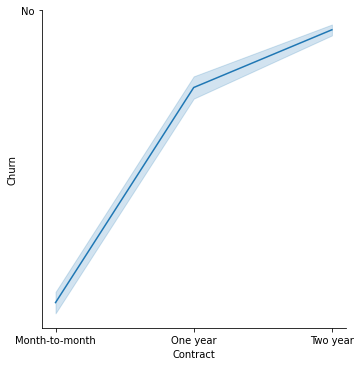

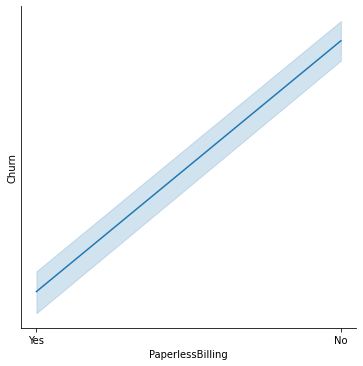

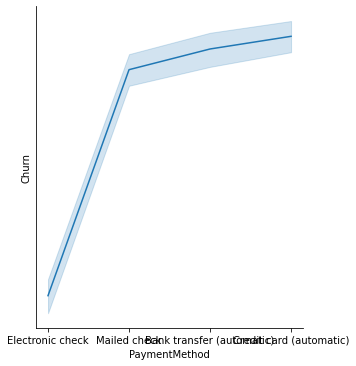

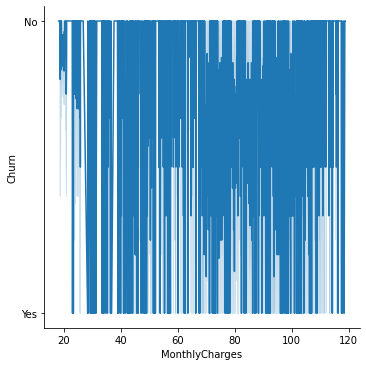

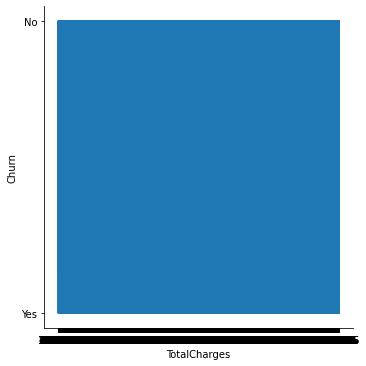

In [111]:
index = 0
features = df.drop("Churn", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Churn", kind="line", data=df)
    index += 1
plt.show()

Below are some meaning full points from above graphs

* Male count is high probablity of stoping services
* SeniorCitizen does not change serivce most of the time
* Customers who has higher tenure they are not loyal customers and they are enjyoing services hence there is less chance of Churn in tha segment
* those who have 1 or 2 year contarct they will not potentila Churn customers
* if monthly charges are high then cutomers will look for another servie provider

In [112]:
# Discribing data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


* Monthly charged have potential outliers
* Max tenure is 72 and min is 0
* tenure has good data because mean and standered deviation is not having much difference

# Encoding Object datatypes with LabelEncoder

In [113]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Before we start I am converting Datatype of "TotalCharges" in to numeric as we have see datatype"TotalCharges" was showing Oject even though this column contain numeric value

In [114]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [54]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [116]:
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Coverted to Float

In [117]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))


In [118]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

We can see all columns are converted to numeric value

In [119]:
# Checking correlation for all colouns

df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375556,-0.195525


If we need ot analysize correaltion of all columns with each other then we can see above chart where we can see correalation of every column with every columns

<AxesSubplot:>

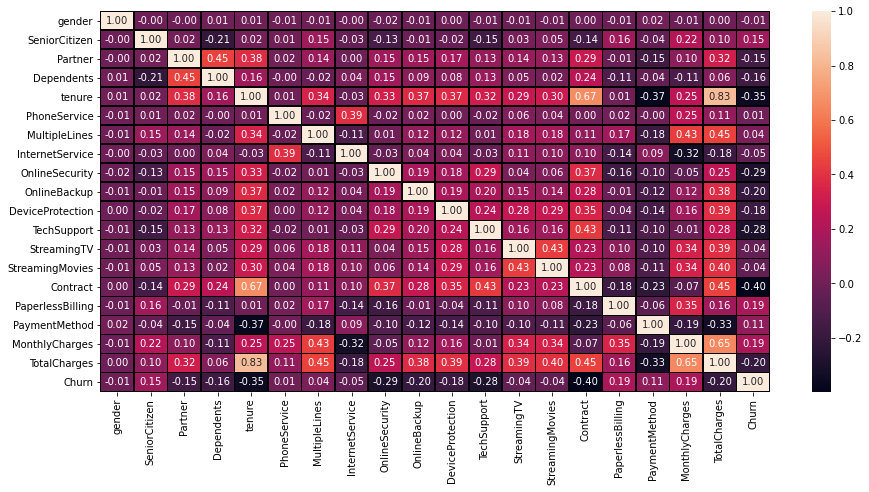

In [120]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

We can visulize with heat map which is good practice.

Below are some points

* monthly charges has highest correlation with Churn
* Contract is having good correaltion
* gender has almost no correaltion with Churn
* tenure,tech support,onlinesecurity are the example of negative correlation

In [121]:
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199484
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

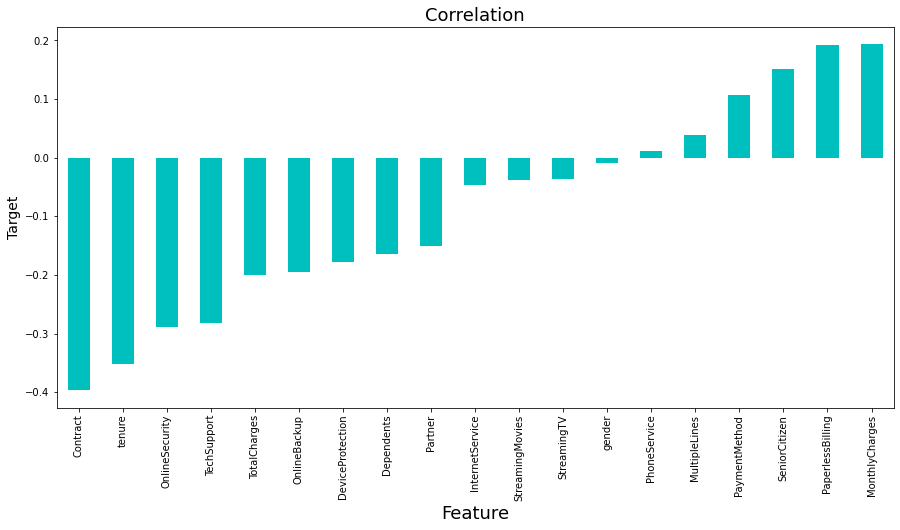

In [122]:
#Checking correlation Separatly with target variable

plt.figure(figsize=(15,7))
df.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()



In [123]:
#Gendar is having almost no correlation so we can drop it


df.drop("gender",axis=1,inplace=True)

In [124]:
df.head(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


We have dropped gender now

# Outliers Checking in Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

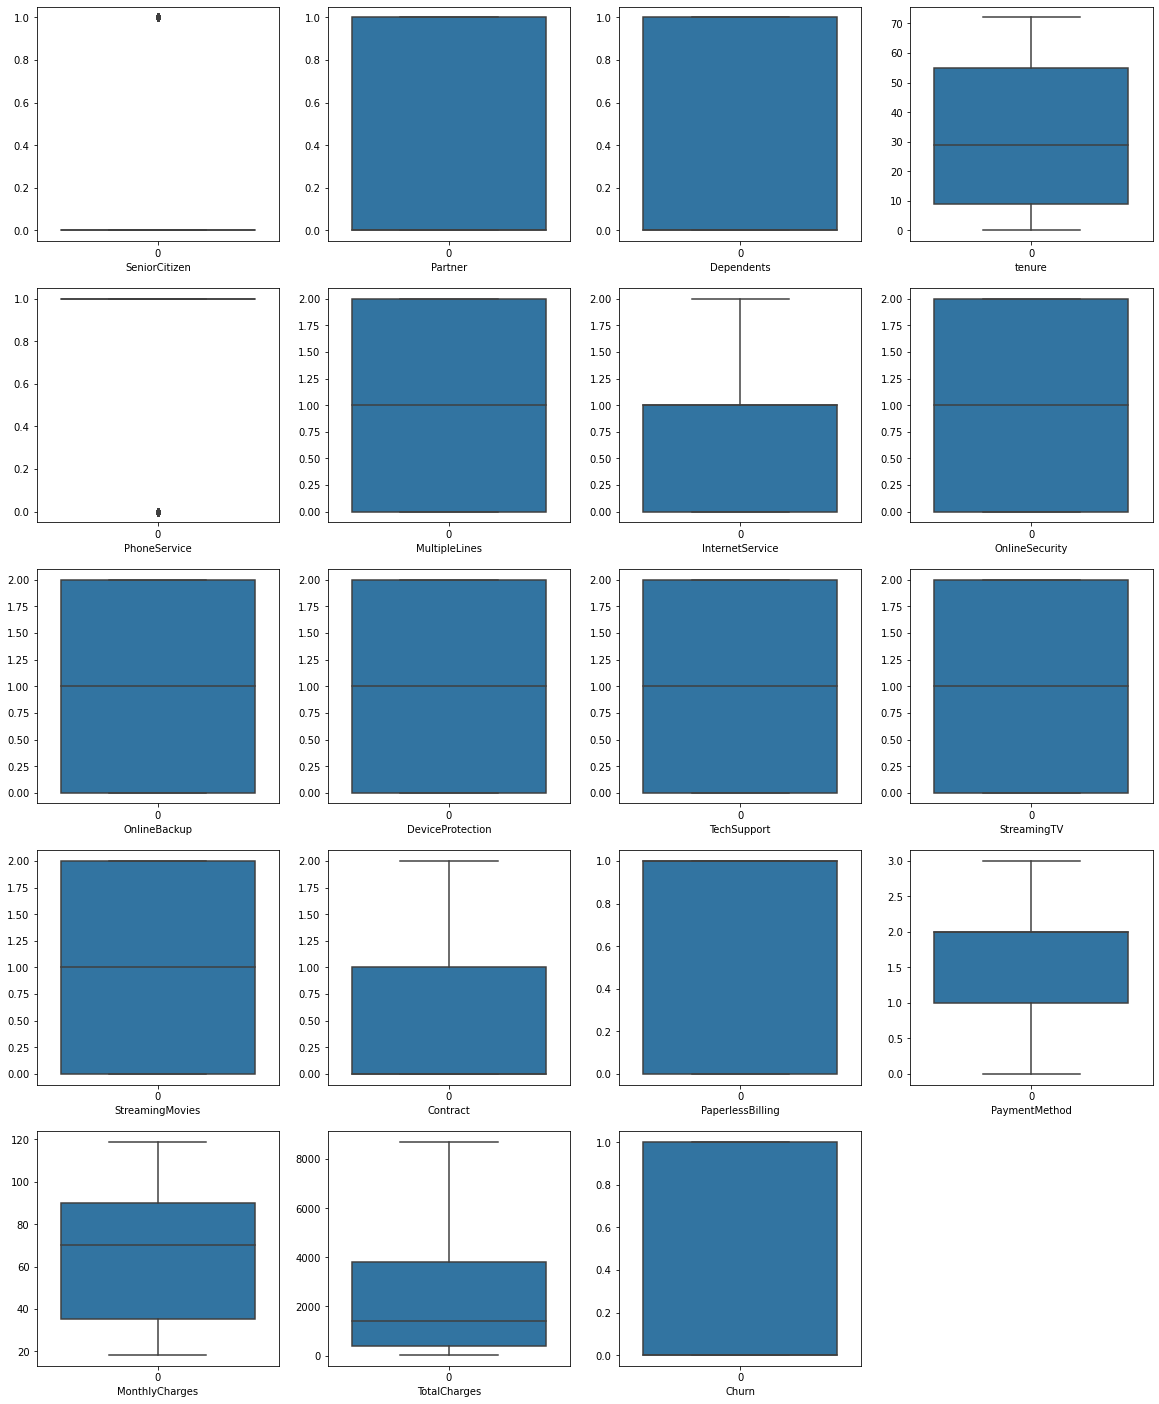

In [125]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=19:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

Looking at the above plots we can see that there is not ouliers present in data for any of the columns in this dataset so we no need to remove outliers

# Checking for skewness

In [126]:
df.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.961642
Churn               1.063031
dtype: float64

We have skewness present in Data

Lets plot to visulize

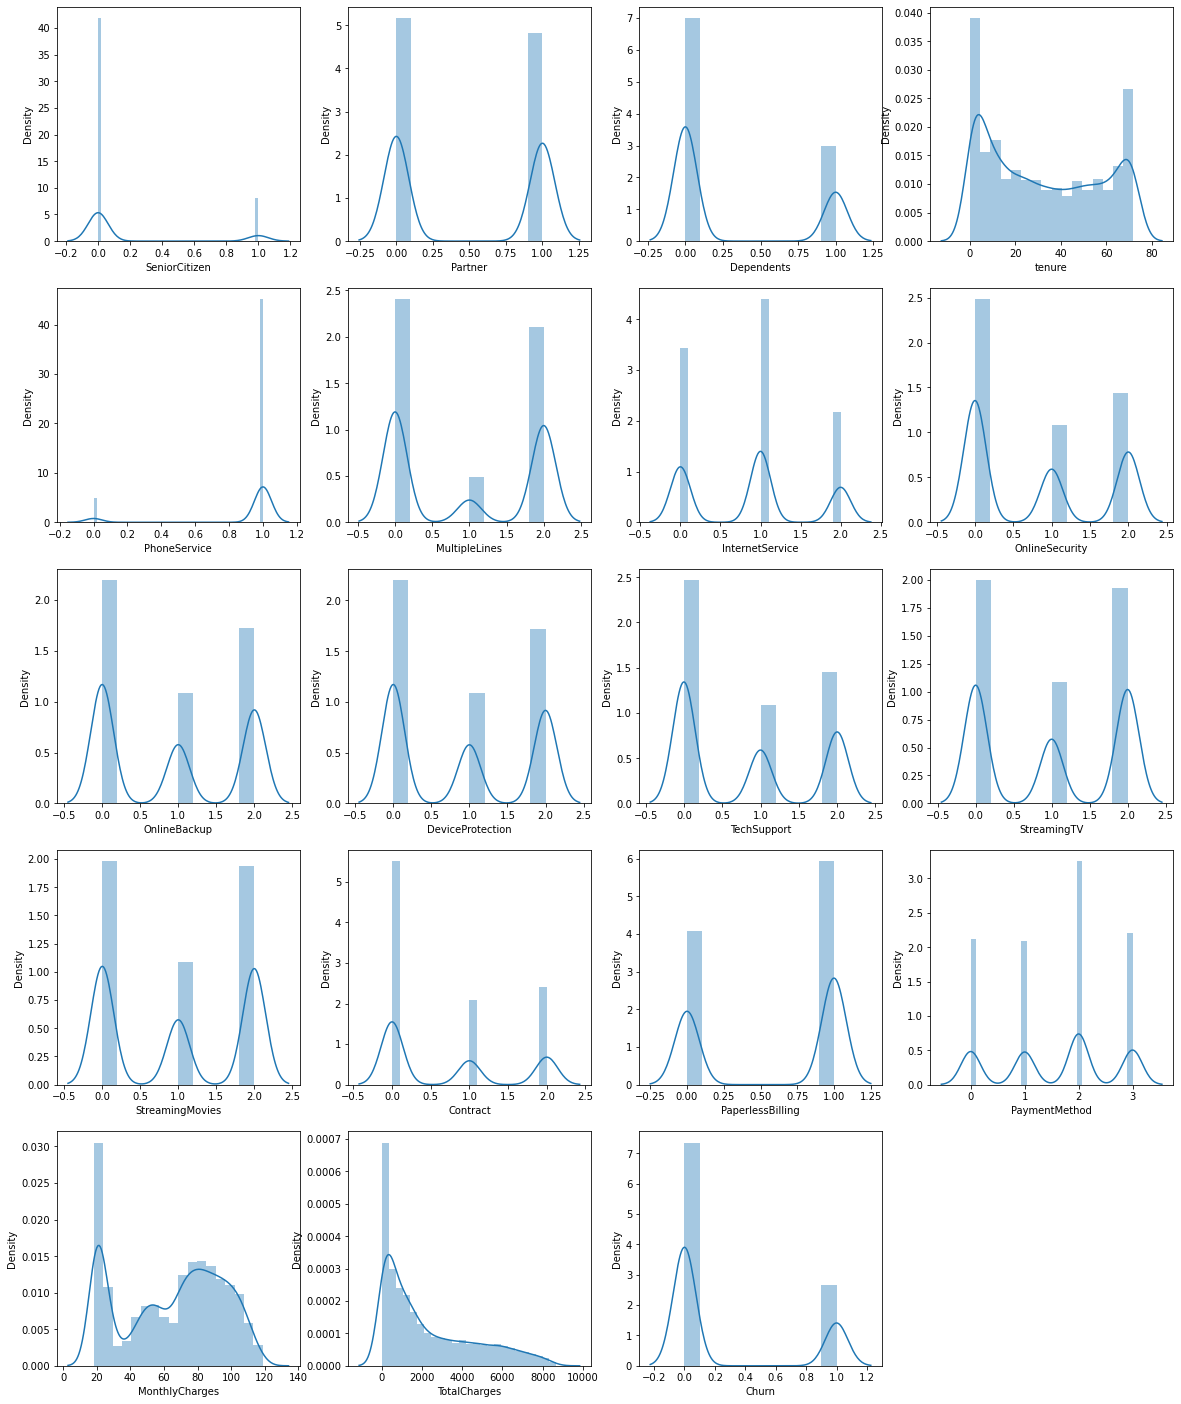

In [127]:

plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=19:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1  

Below is list of skewed columns

* SeniorCitizen
* Dependents
* PhoneService
* Contract
* TotalCharges

In [128]:
skewed_features = ['SeniorCitizen','Dependents','PhoneService','Contract','TotalCharges']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

In [129]:
df[skewed_features] = scale.fit_transform(df[skewed_features].values)
df[skewed_features].head()

,SeniorCitizen,Dependents,PhoneService,Contract,TotalCharges
0,-0.439916,-0.654012,-3.054010,-0.888524,-1.810069
1,-0.439916,-0.654012,0.327438,0.790424,0.254257
2,-0.439916,-0.654012,0.327438,-0.888524,-1.386091
3,-0.439916,-0.654012,-3.054010,0.790424,0.233220
4,-0.439916,-0.654012,0.327438,-0.888524,-1.248808


Checking after removing Skewness

<function matplotlib.pyplot.show(close=None, block=None)>

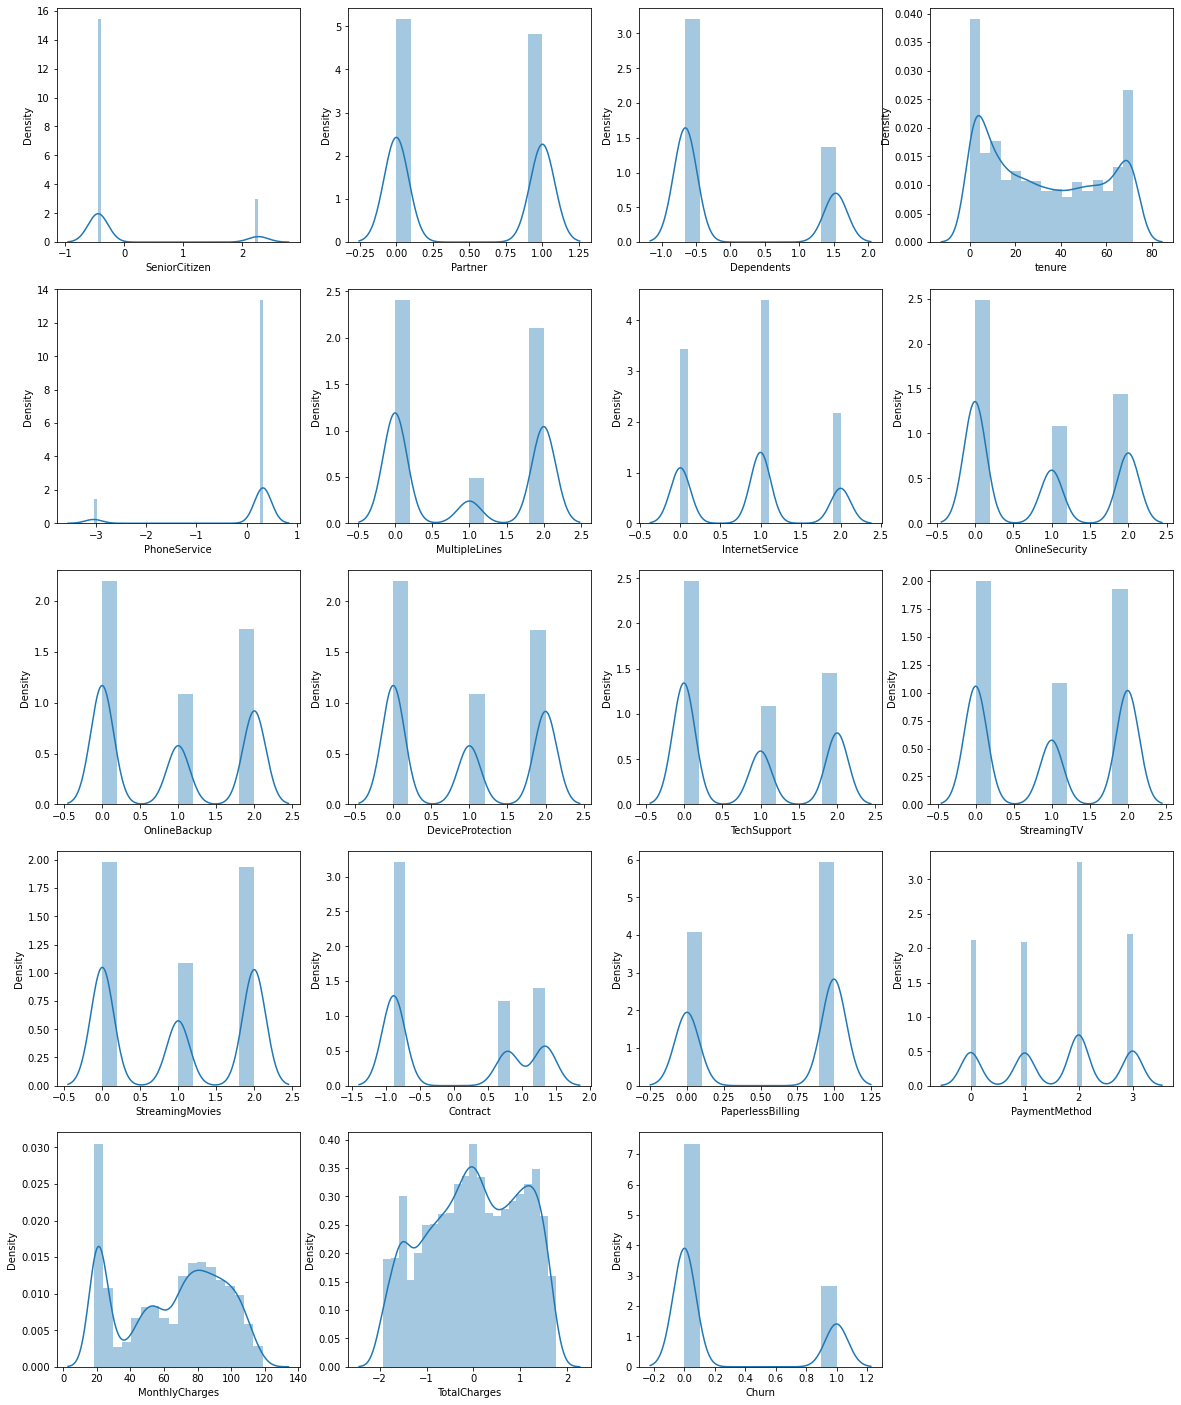

In [130]:

plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=19:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

We have Handles skewness now

In [131]:
df.isnull().sum()


SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

When I converted TotalCharges in Numeric Datatype at that time 11 record got null. Hence I prefer to frop them

In [133]:
df=df.dropna()
df.isnull().sum()


SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

I have drop those nan Values

# Declearing X and Y 

In [135]:

x = df.drop("Churn", axis=1)
y = df["Churn"]

In [136]:
x.shape

(7032, 18)

In [137]:
y.shape

(7032,)

# Over sampling using SMOT

In [138]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [139]:
# Lets see if data in balanec or not

y.value_counts()


1    5163
0    5163
Name: Churn, dtype: int64

We have balanceed data now

In [140]:
print(x.shape)
print(y.shape)

(10326, 18)
(10326,)


# Feature Scaling

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.490629,1.266864,-0.596777,-1.113146,-3.129471,0.062714,-1.268518,-0.757566,1.408260,-0.899434,-0.765501,-1.051034,-1.071527,-0.708295,0.809038,0.430423,-1.320557,-1.661746
1,-0.490629,-0.789351,-0.596777,0.260416,0.321848,-1.002392,-1.268518,1.701220,-0.899212,1.404027,-0.765501,-1.051034,-1.071527,1.092663,-1.236036,1.430548,-0.381741,0.371469
2,-0.490629,-0.789351,-0.596777,-1.071523,0.321848,-1.002392,-1.268518,1.701220,1.408260,-0.899434,-0.765501,-1.051034,-1.071527,-0.708295,0.809038,1.430548,-0.489134,-1.244158
3,-0.490629,-0.789351,-0.596777,0.718270,-3.129471,0.062714,-1.268518,1.701220,-0.899212,1.404027,1.677950,-1.051034,-1.071527,1.092663,-1.236036,-1.569825,-0.889256,0.350750
4,-0.490629,-0.789351,-0.596777,-1.071523,0.321848,-1.002392,0.212567,-0.757566,-0.899212,-0.899434,-0.765501,-1.051034,-1.071527,-0.708295,0.809038,0.430423,0.094595,-1.108944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,-0.490629,-0.789351,0.550461,-0.988276,0.321848,-1.002392,1.693652,0.471827,0.254524,0.252297,0.456224,0.057204,0.036150,-0.708295,-1.236036,-1.569825,-1.545359,-1.246358
10322,-0.490629,-0.789351,-0.596777,0.135547,0.321848,1.127820,0.212567,-0.757566,1.408260,1.404027,-0.765501,1.165442,1.143827,0.689779,0.809038,0.430423,1.236505,0.802850
10323,-0.490629,-0.789351,-0.596777,0.343663,0.321848,-1.002392,0.212567,-0.757566,-0.899212,1.404027,1.677950,-1.051034,0.036150,-0.708295,0.809038,-0.569701,0.676574,0.785449
10324,2.146219,-0.789351,-0.596777,-1.113146,0.321848,1.127820,0.212567,-0.757566,-0.899212,-0.899434,-0.765501,1.165442,-1.071527,-0.708295,0.809038,0.430423,0.635768,-1.203854


# Our Datset is scalled now

As we have little wide range of column I will check VIF to see if there is multicolinearity  available or not

In [142]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,VIF values
0,SeniorCitizen,1.153546
1,Partner,1.524421
2,Dependents,1.381737
3,tenure,11.365724
4,PhoneService,1.720754
5,MultipleLines,1.411445
6,InternetService,1.747064
7,OnlineSecurity,1.340958
8,OnlineBackup,1.241366
9,DeviceProtection,1.320964


I will not drop Monthly Charges because it is very important column  for us. Similarly Tenure is also important

Our Data is ready to process further steps

# Finding Random State

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8751210067763795 on Random State: 33


Random state 33 is good one as it will give us 87 % accuracy.

In [149]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

In [150]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=33)

In [151]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()
Gbc=GradientBoostingClassifier()
BG=BaggingClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT,Gbc,BG]


for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[793 239]
 [200 834]]
Classification report :               precision    recall  f1-score   support

           0       0.80      0.77      0.78      1032
           1       0.78      0.81      0.79      1034

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Accuracy score : 0.787512100677638
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[897 135]
 [125 909]]
Classification report :               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1032
           1       0.87      0.88      0.87      1034

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      206

In [152]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN,EXT,Gbc,BG]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.76331075 0.76125908 0.78450363 0.79951574 0.79467312]
0.7806524638503243
0.015773852177532337


Cross_Validation_score of RandomForestClassifier() is
[0.77783156 0.79467312 0.89588378 0.90653753 0.90460048]
0.8559052947643033
0.057232876734046374


Cross_Validation_score of DecisionTreeClassifier() is
[0.7178122  0.73946731 0.85133172 0.8401937  0.85423729]
0.8006084443392268
0.059345350006165996


Cross_Validation_score of SVC() is
[0.74878993 0.76368039 0.83196126 0.8527845  0.8464891 ]
0.8087410372946987
0.043654368261047675


Cross_Validation_score of KNeighborsClassifier() is
[0.76040658 0.76513317 0.80968523 0.81210654 0.80096852]
0.7896600090476736
0.022316215148837176


Cross_Validation_score of ExtraTreesClassifier() is
[0.77202323 0.78256659 0.89249395 0.90363196 0.90460048]
0.8510632423018594
0.0604736714815863


Cross_Validation_score of GradientBoostingClassifier() is
[0.74782188 0.77239709 0.8653753  0

Decision tree has accuracy score 80 and cross validation score is also 80 that means Decison tree is working Good and we should select this model

# Hyperparameer tunnig for DecisionTreeClassifier

In [153]:
from sklearn.model_selection import GridSearchCV



parameters={"random_state":[33],"criterion": ['gini', 'entropy'],"max_depth":[2,4,6,8,10,12],"min_samples_leaf":[2,3,4,5,6]}

GVC=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)


In [154]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'random_state': [33]})

In [155]:
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'random_state': 33}

Above we found best parameter which we need to use

In [165]:
#initialising GradientBoost with best parameter
Churn_Model=DecisionTreeClassifier(criterion= 'entropy',max_depth= 8,min_samples_leaf= 4,random_state=33)

In [166]:
Churn_Model.fit(x_train, y_train)
pred = Churn_Model.predict(x_test)
acc=accuracy_score(y_test,DTC.predict(x_test))
print("Accuracy Score",acc*100)

Accuracy Score 80.92933204259438


We are still getting same score so will we save this model

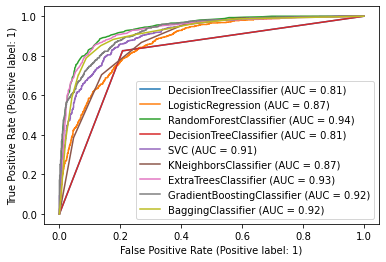

In [167]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,DTC,SV,KNN,EXT,Gbc,BG]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

In above roc curve RandomForest looks good but diffrence between accuracy and cross validation for this model is high hence I choose DecisiontreeClassifier

# Saving best model with 80 % Accuracy

In [168]:

# Saving the model using .pkl
import joblib
joblib.dump(Churn_Model ,"Churn.pkl")

['Churn.pkl']

# Lets use model to predict again

In [170]:
# Loading the saved model
model=joblib.load("Churn.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 0, 0])

In [171]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
2061,1,1
2062,1,1
2063,0,1
2064,0,0


# As per aacuracy score we will get 80% Correct Prediction 

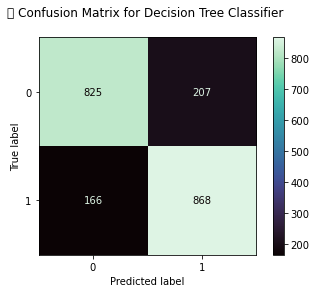

In [174]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Churn_Model, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

* True positive count is 825
* False positve count is 868
* False positive count is 201
* false negative in 166

# Thank You